In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

# Rapidly Exploring Tree

### Define Node Class
* variables : position, parent(previous node)
* methods : 
    * \- (sub) : calculate euclidean distance
    * repr : print node information
    * show : visualize node position

In [22]:
import numpy.linalg as LA
class Node():
    def __init__(self, position, parent=None):
        self.position = np.array(position)
        self.parent = parent
    def __sub__(self, other):
        return LA.norm(self.position - other.position)
    
    def __repr__(self):
        return 'pos:{0}'.format(self.position)
    
    def show(self):
        plt.gca().scatter(self.position[0], self.position[1])
        plt.xlim([0,10])
        plt.ylim([0,10])

### Define RRT Algorithm Class
* variables : 
    * smpl_area : map area for RRT
    * obstacles : circular obstacles informations
* methods : 
    * get_rnd_node : select random point(node) in smpl_area
    * is_goal : goal node detection using euclidean distance
    * is_collision : collision detection using euclidean distance
    * find_nearest_node : find nearest node in tree

In [154]:
class RRTAlg():
    def __init__(self, start=None, end=None, new_node_dist=0.5, smpl_area=[0,10,0,10], obstacles=None):
        self.start = start
        self.end = end
        self.new_node_dist = new_node_dist
        self.smpl_area = smpl_area # [xmin, xmax, ymin, ymax]
        self.obstacles = obstacles
        self.tree = [self.start]
    
    def get_rnd_point(self):
        rnd_pos = np.array([random.uniform(*rrt.smpl_area[0:2]),
                            random.uniform(*rrt.smpl_area[2:])])
        return Node(rnd_pos)

    def is_goal(self, node, margin=0.5):
        if node-self.end < margin:
            return True
        return False
    
    def is_collision(self, node, margin):
        for obs in self.obstacles:
            obs_pos = np.array(obs[:2])
            obs_radius = obs[2]
            distance = LA.norm(node.position - obs_pos) - obs_radius - margin
            if distance < 0:
                return True
        return False
    
    def find_nearest_node(self, rnd_node):
        distances = [rnd_node-node for node in self.tree]
        minidx = distances.index(min(distances))
        return self.tree[minidx]
    

### RRT Class : RRT Algorithm + Visualization

In [155]:
class RRT(RRTAlg):
    
    def show(self):
        self.plot_tree()
        self.plot_obstacles()
        self.plot_final_path()
        
    def plot_tree(self):
        ax = plt.gca()
        for node in self.tree:
            if node.parent:
                pts = np.array([node.position, node.parent.position])
                ax.plot(*pts.T, color='k')
            
    def plot_obstacles(self):
        ax = plt.gca()
        for obs in self.obstacles:
            c = mpatches.Circle(obs[:2], obs[2], fc='k')
            ax.add_artist(c)
    
    def plot_final_path(self):
        if not 'goal_node' in dir(self):
            return False
        
        ax = plt.gca()
        temp_node = self.goal_node
        while temp_node.parent:
            pts = np.array([temp_node.position, temp_node.parent.position])
            ax.plot(*pts.T, color='r')
            temp_node = temp_node.parent
    
    

### Initialization

In [156]:
#init
start_node = Node([5,5])
end_node = Node([1,0.5])
smpl_area = [0,10,0,10]
obstacles = [(4,8,1), (6,4,1)]

rrt = RRT(start_node, end_node, new_node_dist=0.5, smpl_area=smpl_area, obstacles=obstacles)

## Search 
* 'rec' for recording path search
* Loop : 
    * Get Random Point in area
    * Find nearest node in tree
    * Calculate distance vector from the nearest node to the random point
    * Calculate new node : vector of (new_node_len) * (distance vector)
    * check collision and goal. if not, add to tree

In [160]:
max_iter = 500
for i in range(max_iter):
    rnd_node = rrt.get_rnd_point()
    nearest_node = rrt.find_nearest_node(rnd_node)
    distance = (rnd_node.position - nearest_node.position)
    new_node_pos = nearest_node.position + distance/LA.norm(distance) * rrt.new_node_dist
    new_node = Node(new_node_pos, parent=nearest_node)
    
    # collision check
    if not rrt.is_collision(new_node, margin=0.1):
        rrt.tree.append(new_node)
    if rrt.is_goal(new_node):
        print('goal')
        rrt.goal_node = new_node
        break


goal


### Reconstruct Path
*   goal - goal.parent - goal.parent.parent - ...

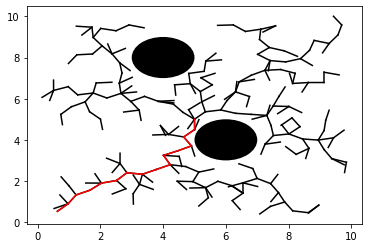

In [161]:
rrt.show()